In [2]:
#@title 1.1. Classes e funções
import sys
sys.path.append('/home/ABTLUS/victor.secco/data_processing') 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams, cycler
from matplotlib.ticker import AutoMinorLocator


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 22
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (6.4,4.8),
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,
                 "xtick.minor.size"     : 3.5,
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 3,
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})

In [3]:

twotheta = []
exp = []
calc = []
bkg = []

path = "/home/ABTLUS/victor.secco/data_processing/DRX/CdSe-S1,S2,S3/"

names = [name for name in os.listdir(path)]
names.sort()

for i, name in enumerate(names): 
    df = pd.read_csv(os.path.join(path, name), skiprows = 1)
    twotheta.append(df["'x"])
    bkg = df['Bkg']
    exp.append(df[f"Amostra_S{i+1}.raw"]-bkg)
    calc.append(df['Ycalc']-bkg)
    

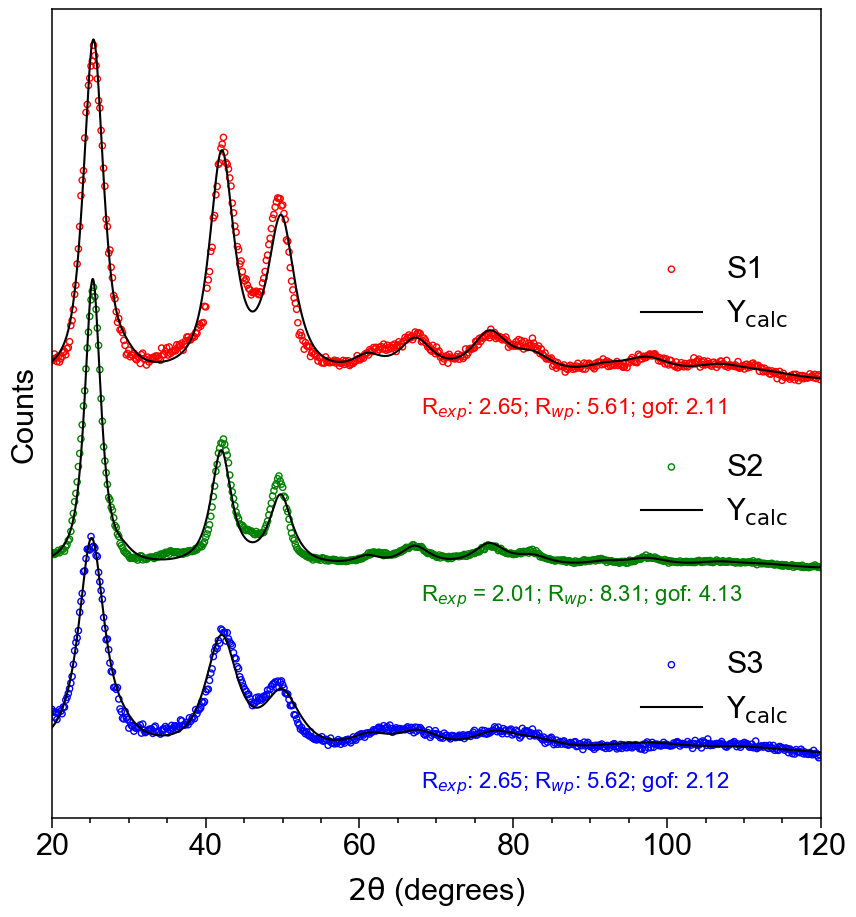

In [10]:
plt.figure(figsize=(10,10))
# Plot the graphs
plt.scatter(twotheta[0][::8], exp[0][::8], label='S1', s = 20, facecolors='none', edgecolors='red')
plt.plot(twotheta[0], calc[0], label=r'$\mathrm{Y_{calc}}$', color = 'black')

plt.plot([], [], ' ', label=' \n\n') 


plt.scatter(twotheta[1][::8], exp[1][::8]/3 - 3000, label='S2',  s = 20, facecolors='none', edgecolors='green')
plt.plot(twotheta[1], calc[1]/3 - 3000, label=r'$\mathrm{Y_{calc}}$', color = 'black')

plt.plot([], [], ' ', label=' \n\n') 

plt.scatter(twotheta[2][::8], exp[2][::8] - 6000, label='S3',  s = 20, facecolors='none', edgecolors='blue')
plt.plot(twotheta[2], calc[2] - 6000, label=r'$\mathrm{Y_{calc}}$', color = 'black')

# Set the limits for x and y axes
plt.xlim(20, 120)
plt.ylim(-7000, 6000)

plt.xlabel(r"$\mathrm{2\theta}$ (degrees)")
plt.ylabel("Counts")
# Remove x-axis ticks and numbers
plt.yticks([])

# Add a legend

plt.legend(frameon = False, labelspacing=0.5, loc=(0.75, 0.10))

plt.text(68, -500, 'R$_{exp}$: 2.65; R$_{wp}$: 5.61; gof: 2.11', color='red', fontsize=16)
plt.text(68, -3500, 'R$_{exp}$ = 2.01; R$_{wp}$: 8.31; gof: 4.13', color='green', fontsize=16)
plt.text(68, -6500, 'R$_{exp}$: 2.65; R$_{wp}$: 5.62; gof: 2.12', color='blue', fontsize=16)

# Display the plot
plt.show()


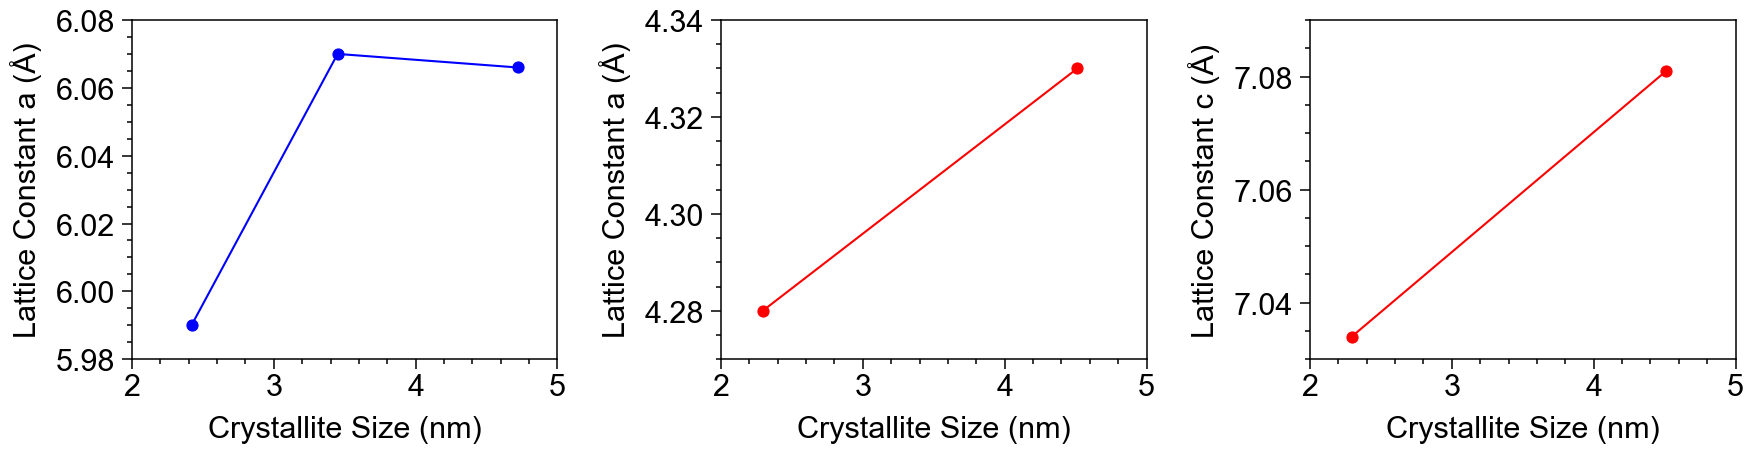

In [18]:
import matplotlib.pyplot as plt

# Data
w_size = [4.512, 2.295]  # crystallite size in nm
z_size = [2.42, 3.45, 4.72]  # crystallite size in nm
za = [5.99, 6.07, 6.066]  # lattice constant a in Å
wa = [4.33, 4.28]  # lattice constant a in Å
wc = [7.081, 7.034]  # lattice constant c in Å

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot z_size vs za with filled markers and line
axs[0].plot(z_size, za, marker='o', markersize=8, linestyle='-', color='blue', markerfacecolor='blue')
axs[0].set_xlabel('Crystallite Size (nm)')
axs[0].set_ylabel('Lattice Constant a (Å)')

# Plot w_size vs wa with filled markers and line
axs[1].plot(w_size, wa, marker='o', markersize=8, linestyle='-', color='red', markerfacecolor='red')
axs[1].set_xlabel('Crystallite Size (nm)')
axs[1].set_ylabel('Lattice Constant a (Å)')
axs[1].set_ylim(4.27, 4.34)

# Plot w_size vs wc with filled markers and line
axs[2].plot(w_size, wc, marker='o', markersize=8, linestyle='-', color='red', markerfacecolor='red')
axs[2].set_xlabel('Crystallite Size (nm)')
axs[2].set_ylabel('Lattice Constant c (Å)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
